In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling as pdp

In [2]:
import os
os.chdir('..')
from scripts.project_functions import load_and_process
from scripts.project_functions import rem_columns
sns.set_theme(style="darkgrid",font_scale = 1.5)

A question that many want to know, is whether their country is the best in terms of winning Olympic medals. The research question that I have decided to explore and analyze is:

<u>**Research Question**</u>

**Which Country has been awarded the most medals?**

In [3]:
data = load_and_process("../data/raw/Summer-Olympic-medals-1976-to-2008 2.csv")
data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


<u>**Columns Removed**</u>

The three main columns that will be explored are 'Country' 'Year' and 'Medal'. In order to focus on the selected columns, I must remove the others

In [4]:
rem_columns(data)

,City,Year,Country,Medal
0,Montreal,1976.0,East Germany,Silver
1,Montreal,1976.0,Soviet Union,Bronze
2,Montreal,1976.0,United States,Gold
3,Montreal,1976.0,Italy,Silver
4,Montreal,1976.0,United States,Bronze
...,...,...,...,...
15311,Beijing,2008.0,France,Bronze
15312,Beijing,2008.0,Georgia,Gold
15313,Beijing,2008.0,Azerbaijan,Silver
15314,Beijing,2008.0,France,Gold


**Profile Report**

After generating a report, we are able to clearly see that the United States is the country with the most medals awarded. We can generate a basic visualization to see the top ten medal winning countries.

In [5]:
rem_columns(data).profile_report()

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Visualization #1**

Text(0.5, 1.0, 'Top 5 Medal Winning Countries')

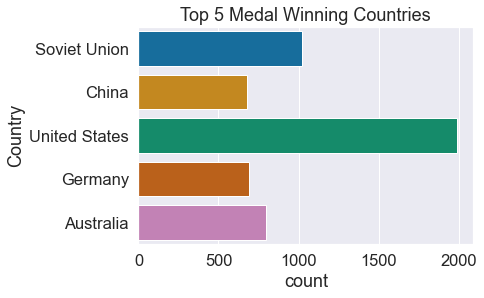

In [6]:
total = rem_columns(data).groupby(["Country"])["Medal"].count().reset_index(name="Count").sort_values(by='Count',ascending=False).reset_index()
countries = sns.countplot(data = rem_columns(data), palette = "colorblind", order = total[0:5]['Country'].value_counts().index, y = "Country")
countries.set_title('Top 5 Medal Winning Countries')

**Visualization #2**

Now that we can visually see that the U.S is the top medal winner, I will graph the type of medals earned by each country. We can in fact see that the U.S not only has earned the most medals, but they have earned the most gold/siver/bronze medals compared to the other top 5 countries

Text(0.5, 1.0, 'Top 5 Medal Winning Countries')

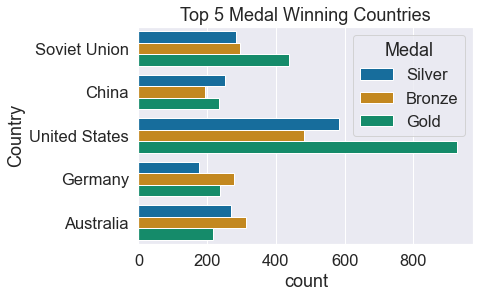

In [7]:
countries_2 = sns.countplot(data = rem_columns(data), palette = "colorblind", hue = "Medal", order = total[0:5]['Country'].value_counts().index,
                   y = "Country")
countries_2.set_title('Top 5 Medal Winning Countries')

**Visualization #3**

Simple closer look at the U.S medals

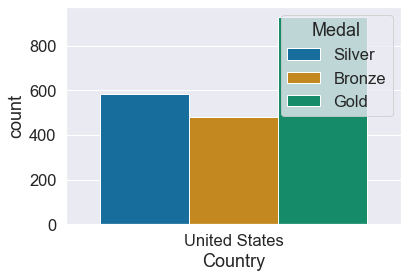

In [8]:
us_country = sns.countplot(data = rem_columns(data), palette = "colorblind", hue = "Medal",order = total[0:1]['Country'].value_counts().index,
                           x = "Country")

**Visualization #4**

Finally we can look at the amount of medals earned by the U.S yearly. The graph below helps indicate that the majority of medals were won between 1980-1990. We will explore this further in task 5.

Text(0.5, 1.0, 'U.S Medals Won between 1976-2008')

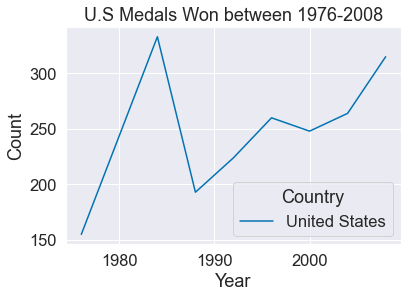

In [11]:
total_2 = rem_columns(data).groupby(["Country","Year"])["Medal"].count().reset_index(name="Count").sort_values(by='Count',ascending=False).reset_index()
us_line = total_2.query("Country == 'United States'")
us_time = sns.lineplot(data = us_line, palette = "colorblind", x = "Year", y = "Count", hue = "Country")
us_time.set_title('U.S Medals Won between 1976-2008')